### Deliverable 1: Preprocessing the Data for a Neural Network

In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
print(application_df.shape)
application_df.head()

(34299, 12)


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)
print(application_df.shape)
application_df.head()

(34299, 10)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

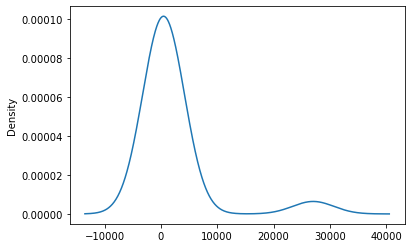

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_applications = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_applications:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2150        1
C2561        1
C4120        1
C4500        1
C1283        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

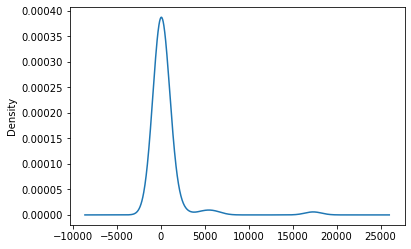

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
print(application_df.dtypes)
cat_features = [application_df.dtypes.index[i] for i in range(len(application_df.dtypes)) if application_df.dtypes[i] == 'object']
print(cat_features)

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object
['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS']


In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat_features]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_features)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True).drop(cat_features, axis=1)
print(application_df.shape)
application_df.head()

(34299, 44)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
target = ['IS_SUCCESSFUL']
X = application_df.drop(target, axis=1)
y = application_df[target]

print(X.shape)
print(y.shape)

# # Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34299, 43)
(34299, 1)
(25724, 43) (8575, 43) (25724, 1) (8575, 1)


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/", exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=X_train.shape[0]*5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5696 - acc: 0.7215
Epoch 2/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5547 - acc: 0.7289
Epoch 3/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5518 - acc: 0.7310
Epoch 4/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5508 - acc: 0.7316
Epoch 5/100
24992/25724 [============================>.] - ETA: 0s - loss: 0.5489 - acc: 0.7312
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5492 - acc: 0.7315
Epoch 6/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5483 - acc: 0.7320
Epoch 7/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5481 - acc: 0.7319
Epoch 8/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5474 - acc: 0.7336
Epoch 9/100
25724/25724 [==========

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5380 - acc: 0.7375
Epoch 64/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5385 - acc: 0.7387
Epoch 65/100
25632/25724 [============================>.] - ETA: 0s - loss: 0.5383 - acc: 0.7380
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5382 - acc: 0.7381
Epoch 66/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5378 - acc: 0.7392
Epoch 67/100
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5373 - acc: 0.7391
Epoch 68/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5378 - acc: 0.7390
Epoch 69/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5374 - acc: 0.7390
Epoch 70/100
25664/25724 [============================>.] - ETA: 0s - loss: 0.5375 - acc: 0.7392
Epoch 00070: saving model to checkpoints/weight

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5549 - acc: 0.7279
Loss: 0.5549315284083953, Accuracy: 0.7279300093650818


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

### Deliverable 3: Optimize the Model

<IPython.core.display.Javascript object>


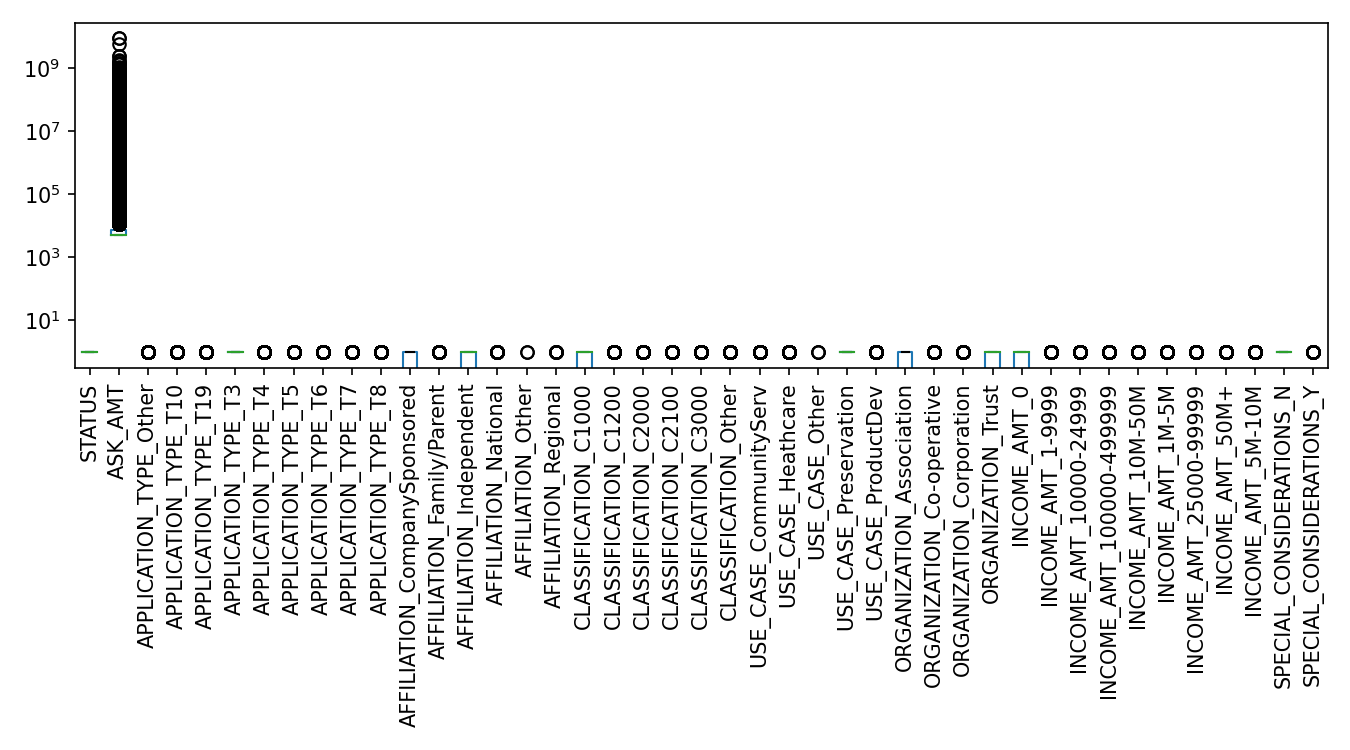

In [21]:
import matplotlib.pyplot as plt
%matplotlib notebook
# Re-evaluate input data
X_train.plot(kind='box', rot=90, figsize=(9,5), logy=True)
plt.tight_layout()

In [22]:
# Drop ASK_AMT column due to outliers
X_train = X_train.drop('ASK_AMT', axis=1)
X_test = X_test.drop('ASK_AMT', axis=1)

# Re-fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                3440      
_________________________________________________________________
dense_4 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=X_train.shape[0]*5)

In [25]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5722 - acc: 0.7182
Epoch 2/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5554 - acc: 0.7280
Epoch 3/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5526 - acc: 0.7305
Epoch 4/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5504 - acc: 0.7304
Epoch 5/100
25184/25724 [============================>.] - ETA: 0s - loss: 0.5494 - acc: 0.7331
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5493 - acc: 0.7331
Epoch 6/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5485 - acc: 0.7320
Epoch 7/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5471 - acc: 0.7332
Epoch 8/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5471 - acc: 0.7330
Epoch 9/100
25724/25724 [==========

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5370 - acc: 0.7388
Epoch 64/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5371 - acc: 0.7383
Epoch 65/100
24736/25724 [===========================>..] - ETA: 0s - loss: 0.5359 - acc: 0.7387
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5368 - acc: 0.7380
Epoch 66/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5369 - acc: 0.7382
Epoch 67/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5368 - acc: 0.7394
Epoch 68/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5367 - acc: 0.7389
Epoch 69/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5365 - acc: 0.7390
Epoch 70/100
25056/25724 [============================>.] - ETA: 0s - loss: 0.5366 - acc: 0.7392
Epoch 00070: saving model to checkpoints/weight

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5567 - acc: 0.7268
Loss: 0.5567028446795294, Accuracy: 0.7267638444900513


In [27]:
# Redefine neural network model architecture

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 9,401
Trainable params: 9,401
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=X_train.shape[0]*5)

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5937 - acc: 0.7037
Epoch 2/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5742 - acc: 0.7216
Epoch 3/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5685 - acc: 0.7234
Epoch 4/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5618 - acc: 0.7260
Epoch 5/100
24672/25724 [===========================>..] - ETA: 0s - loss: 0.5598 - acc: 0.7265
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5592 - acc: 0.7269
Epoch 6/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5564 - acc: 0.7282
Epoch 7/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5546 - acc: 0.7296
Epoch 8/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5536 - acc: 0.7290
Epoch 9/100
25724/25724 [==========

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5382 - acc: 0.7386
Epoch 64/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5384 - acc: 0.7371
Epoch 65/100
24096/25724 [===========================>..] - ETA: 0s - loss: 0.5365 - acc: 0.7403
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5381 - acc: 0.7378
Epoch 66/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5383 - acc: 0.7393
Epoch 67/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5380 - acc: 0.7390
Epoch 68/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5376 - acc: 0.7381
Epoch 69/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5377 - acc: 0.7371
Epoch 70/100
24160/25724 [===========================>..] - ETA: 0s - loss: 0.5364 - acc: 0.7385
Epoch 00070: saving model to checkpoints/weight

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5531 - acc: 0.7301
Loss: 0.553060495241738, Accuracy: 0.7301457524299622


In [31]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=X_train.shape[0]*5)

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 9,401
Trainable params: 9,401
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=X_train.shape[0]*5)

In [34]:
# Train model over a greater number of epochs
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, callbacks=[cp_callback])

Epoch 1/150
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5932 - acc: 0.7069
Epoch 2/150
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5748 - acc: 0.7217
Epoch 3/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5680 - acc: 0.7248
Epoch 4/150
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5620 - acc: 0.7254
Epoch 5/150
25312/25724 [============================>.] - ETA: 0s - loss: 0.5588 - acc: 0.7249
Epoch 00005: saving model to checkpoints/weights.05.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5586 - acc: 0.7254
Epoch 6/150
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5562 - acc: 0.7287
Epoch 7/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5551 - acc: 0.7289
Epoch 8/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5537 - acc: 0.7299
Epoch 9/150
25724/25724 [==========

25724/25724 [==============================] - 1s 29us/sample - loss: 0.5383 - acc: 0.7370
Epoch 64/150
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5381 - acc: 0.7383
Epoch 65/150
24960/25724 [============================>.] - ETA: 0s - loss: 0.5381 - acc: 0.7388
Epoch 00065: saving model to checkpoints/weights.65.hdf5
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5384 - acc: 0.7385
Epoch 66/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5378 - acc: 0.7378
Epoch 67/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5377 - acc: 0.7384
Epoch 68/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5374 - acc: 0.7386
Epoch 69/150
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5376 - acc: 0.7384
Epoch 70/150
25152/25724 [============================>.] - ETA: 0s - loss: 0.5377 - acc: 0.7380
Epoch 00070: saving model to checkpoints/weight

24416/25724 [===========================>..] - ETA: 0s - loss: 0.5332 - acc: 0.7400
Epoch 00125: saving model to checkpoints/weights.125.hdf5
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5335 - acc: 0.7395
Epoch 126/150
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5337 - acc: 0.7397
Epoch 127/150
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5334 - acc: 0.7407
Epoch 128/150
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5332 - acc: 0.7406
Epoch 129/150
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5332 - acc: 0.7393
Epoch 130/150
24288/25724 [===========================>..] - ETA: 0s - loss: 0.5339 - acc: 0.7396
Epoch 00130: saving model to checkpoints/weights.130.hdf5
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5334 - acc: 0.7396
Epoch 131/150
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5334 - acc: 0.

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5645 - acc: 0.7297
Loss: 0.5644938928184287, Accuracy: 0.72967928647995


In [36]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")